# <center> TP N°5 </center>
## <center> Différences finies

</center>
<div>
    <center> RAZAFINDRAZAKA Henintsoa </center>
    <center> Wang James </center>
    <center> ____________</center>
    <center> ING5 SI GR02 </center>
    <center> 15/11/2020 </center>
</div>

## 1. Résolution analytique de l'équation différentielle pour $f(x)=sin(\pi x)$

$$
\left\{
    \begin{array}{ll}
        -u''(x) = f(x) \ \text{ pour } \ x \in \ \rbrack 0,1 \lbrack \\
        u(0)=0, \ \ u(1)=0
    \end{array}
\right. \\
$$
<br>
$$
\Leftrightarrow
\left\{
    \begin{array}{ll}
        -u''(x) = sin(\pi x) \ \text{ pour } \ x \in \ \rbrack 0,1 \lbrack \\
        u(0)=0, \ \ u(1)=0
    \end{array}
\right. \\
$$
<br>
$$
\Leftrightarrow
\left\{
    \begin{array}{ll}
        u'(x) = \int_x -sin(\pi x) \ dx \\ 
        \ \ \ \ \ \ \ = \frac{1}{\pi}cos(\pi x) + a, \ \ \ a \in \mathbb{R} \\
        u(0)=0, \ \ u(1)=0
    \end{array}
\right. \\
$$
<br>
$$
\Leftrightarrow
\left\{
    \begin{array}{ll}
        u(x) = \int_x \frac{1}{\pi}cos(\pi x) + a \ dx \\ 
        \ \ \ \ \ \ \ = \frac{1}{\pi^2} sin(\pi x) + ax + b, \ \ \ a,b \in \mathbb{R} \\
        u(0)=0, \ \ u(1)=0
    \end{array}
\right. \\
$$
<br>
$$
\text{Or on a:} \\
\left\{
    \begin{array}{ll}
        u(0)=0\\
        u(1)=0
    \end{array}
\right. \\
\Leftrightarrow
\left\{
    \begin{array}{ll}
        u(0) = \frac{1}{\pi^2} sin(\pi \cdot 0) + a \cdot 0 + b = 0 \ \ \ \Rightarrow b = 0\\ 
        u(1) = \frac{1}{\pi^2} sin(\pi \cdot 1) + a \cdot 1 + b = 0 \ \ \ \Rightarrow a = 0
    \end{array}
\right. \\
$$
<br>
<br>
$$
\text{CONCLUSION} \\
u(x) = \frac{1}{\pi^2} sin(\pi x) \\
$$

## 2. On suppose que la force appliquée soit $f(x) = x(1-x)$ et on prend $N = 20$ intervalles. Construire la matrice $A$ et le vecteur $b$ correspondants.

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import time

# Nombre d'intervalles
N = 20
h = 1/N

def f(x):
    return x*(1-x)
f_vect = np.vectorize(f)

x = np.linspace(0,1,N-1)
b = f_vect(x)

Diag_below = -1 * np.ones((N-2,))
Diag_above = -1 * np.ones((N-2,))
Diag_main  =  2 * np.ones((N-1,))
A = (1/h**2) * ( np.diag(Diag_below, -1) + np.diag(Diag_main) + np.diag(Diag_above, 1) )
print("A = ",A.shape)
print("\nb = ",b.shape)

A =  (19, 19)

b =  (19,)


## 3. Calculer la solution du système linéaire $Au = b$ 

### 3.1. Résoudre avec la factorisation $LU$ de $A$. Calculer le temps nécessaire. 

In [2]:
def trianginf(T,b):
    n = len(b)
    x = np.zeros(b.shape)

    x[0] = b[0] / T[0][0]
    for i in range(1,n):
        sigma = 0
        for j in range(0, i):
            sigma += T[i][j] * x[j]
        x[i] = (1/T[i][i]) * ( b[i] - sigma )
    return x

def triangsup(T,b):
    n = len(b)
    x = np.zeros(b.shape)

    x[n-1] = b[n-1] / T[n-1][n-1]
    for i in range(n-2,-1,-1):
        sigma = 0
        for j in range(i+1, n):
            sigma += T[i][j] * x[j]
        x[i] = (1/T[i][i]) * ( b[i] - sigma )
    return x

def ludecomp(A):
    n = A.shape[0]
    L = np.zeros(A.shape)
    U = np.zeros(A.shape)
    L[0][0] = 1
    
    for j in range(0, n):
        U[0][j] = A[0][j]
        
    for i in range(1, n):
        L[i][0] = A[i][0] / U[0][0]
        
    for i in range(1, n):
        L[i][i] = 1
        s0 = 0
        for k in range(0, i):
            s0 += L[i][k] * U[k][i]
        U[i][i] = A[i][i] - s0
        
        for j in range(i, n):
            s1 = 0
            for k in range(0, i):
                s1 += L[i][k] * U[k][j]
            U[i][j] = A[i][j] - s1
            
            s2 = 0
            for k in range(0, i):
                s2 += L[j][k] * U[k][i]
            L[j][i] = (1 / U[i][i]) * (A[j][i] - s2)
    return L, U

In [3]:
start_time = time.time()

L, U = ludecomp(A)
y = trianginf(L,b)
u = triangsup(U,y)

end_time = time.time()
temps_LU = end_time - start_time
print( "\nTemps d'execution (LU) : %s seconds " % (temps_LU))

precision = 3
print("\nA.u = ", np.round(A.dot(u), precision) )
print("\n b  = ", np.round(b, precision))


Temps d'execution (LU) : 0.0019826889038085938 seconds 

A.u =  [0.    0.052 0.099 0.139 0.173 0.201 0.222 0.238 0.247 0.25  0.247 0.238
 0.222 0.201 0.173 0.139 0.099 0.052 0.   ]

 b  =  [0.    0.052 0.099 0.139 0.173 0.201 0.222 0.238 0.247 0.25  0.247 0.238
 0.222 0.201 0.173 0.139 0.099 0.052 0.   ]


### 3.2. Résoudre directement avec $A^{-1}$ et comparer le temps de calcul. 

In [4]:
start_time = time.time()

A_inv = np.linalg.inv(A)
u = A_inv.dot(b)

end_time = time.time()
temps_inv = end_time - start_time
print( "\nTemps d'execution (A^-1): %s seconds " % (temps_inv))

precision = 3
print("\nA.u = ", np.round(A.dot(u), precision) )
print("\n b  = ", np.round(b, precision))


Temps d'execution (A^-1): 0.004023313522338867 seconds 

A.u =  [0.    0.052 0.099 0.139 0.173 0.201 0.222 0.238 0.247 0.25  0.247 0.238
 0.222 0.201 0.173 0.139 0.099 0.052 0.   ]

 b  =  [0.    0.052 0.099 0.139 0.173 0.201 0.222 0.238 0.247 0.25  0.247 0.238
 0.222 0.201 0.173 0.139 0.099 0.052 0.   ]


> On observe que l'algorithme de résolution du système avec la factorisation $LU$ nécessite moins de temps de calcul que l'algorithme d'inversion de matrice `np.linalg.inv` de numpy.

### 3.3. Résoudre avec la factorisation de Cholesky de $A$. Comparer le temps de calcul.

In [5]:
def cholesky(A):
    n = A.shape[0]
    C = np.zeros((n,n))
    C[0][0] = np.sqrt(A[0][0])

    for i in range(1, n):
        C[i][0] = A[i][0] / C[0][0]

    for j in range(1, n):
        s0 = 0 
        for k in range(0, j):
            s0 += C[j][k]**2
        C[j][j] = np.sqrt(A[j][j] - s0)
        for i in range (j, n):
            s1 = 0
            for k in range(0, j):
                s1 += C[i][k] * C[j][k]
            C[i][j] = (1 / C[j][j]) * ( A[i][j] - s1) 
    return C

In [6]:
start_time = time.time()

C = cholesky(A)
y = trianginf(C,b)
u = triangsup(C.T,y)

end_time = time.time()
temps_cholesky = end_time - start_time
print( "\nTemps d'execution (Cholesky) : %s seconds" % (end_time - start_time))

precision = 3
print("\nA.u = ", np.round(A.dot(u), precision) )
print("\n b  = ", np.round(b, precision))


Temps d'execution (Cholesky) : 0.000997781753540039 seconds

A.u =  [0.    0.052 0.099 0.139 0.173 0.201 0.222 0.238 0.247 0.25  0.247 0.238
 0.222 0.201 0.173 0.139 0.099 0.052 0.   ]

 b  =  [0.    0.052 0.099 0.139 0.173 0.201 0.222 0.238 0.247 0.25  0.247 0.238
 0.222 0.201 0.173 0.139 0.099 0.052 0.   ]


> On observe que l'algorithme de résolution du système avec la factorisation de Cholesky nécessite autant de temps de calcul que l'algorithme de factorisation $LU$ qui était plus performante que `np.linalg.inv`.

## 4. Résolution de l'équation différentielle par les différences finies 

### 4.1. Implémentation de la méthode des différences finies

In [17]:
def differences_finies(f, N, u0, uN):
    #    f   : fonction f(x) second membre
    #    N   : nombre d'intervalles 
    # u0, uN : condition initiales
    
    h = 1/N

    f_vect = np.vectorize(f)

    x = np.linspace(0,1,N+1)
    b = f_vect(x[1:N])

    Diag_below = -1 * np.ones((b.shape[0]-1,))
    Diag_above = -1 * np.ones((b.shape[0]-1,))
    Diag_main  =  2 * np.ones((b.shape[0],))
    A = (1/h**2) * ( np.diag(Diag_below, -1) + np.diag(Diag_main) + np.diag(Diag_above, 1) )
    
    C = cholesky(A)
    y = trianginf(C,b)
    u = triangsup(C.T,y)
    
    result = np.zeros((u.shape[0] + 2,))
    result[0]   = u0
    result[1:N] = u
    result[N]   = uN
    
    return result,x
    

In [18]:
def f1(x):
    return np.sin(np.pi * x)
ui,xi = differences_finies(f1,N,0,0)
ui

array([0.        , 0.01588276, 0.03137443, 0.04609355, 0.0596777 ,
       0.07179239, 0.08213931, 0.09046369, 0.09656055, 0.10027977,
       0.10152977, 0.10027977, 0.09656055, 0.09046369, 0.08213931,
       0.07179239, 0.0596777 , 0.04609355, 0.03137443, 0.01588276,
       0.        ])

### 4.2. Représentation graphique du déplacement $u$ du câble aux noeuds $x_i$ de l'intervalle $[0,1]$

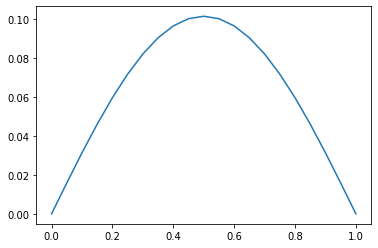

In [19]:
plt.plot(xi, ui)
plt.show()

### 4.3. Comparaison graphique entre le déplacement approché avec la solution exacte du problème

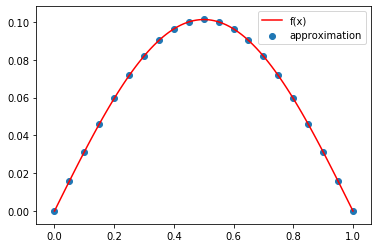

In [28]:
x_plot = np.linspace(0,1,100)
plt.plot(x_plot, (1/np.pi**2) * np.sin(x_plot*np.pi), label='f(x)', color='red')
plt.scatter(xi, ui, label='approximation')
plt.legend()
plt.show()